# **AAI EXP 5 - YASH ASHOK SHIRSATH**

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20 completed.
Epoch 2/20 completed.
Epoch 3/20 completed.
Epoch 4/20 completed.
Epoch 5/20 completed.
Epoch 6/20 completed.
Epoch 7/20 completed.
Epoch 8/20 completed.
Epoch 9/20 completed.
Epoch 10/20 completed.
Epoch 11/20 completed.
Epoch 12/20 completed.
Epoch 13/20 completed.
Epoch 14/20 completed.
Epoch 15/20 completed.
Epoch 16/20 completed.
Epoch 17/20 completed.
Epoch 18/20 completed.
Epoch 19/20 completed.
Epoch 20/20 completed.


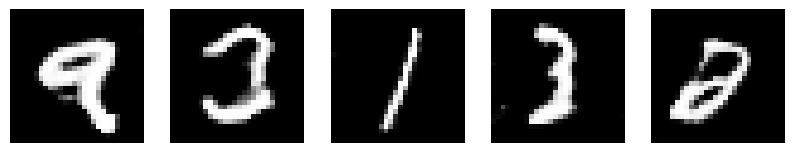

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Hyperparameters
LATENT_DIM = 100
IMG_SHAPE = (28, 28, 1)
BATCH_SIZE = 64  # Reduced batch size for faster training
EPOCHS = 20  # Fewer epochs for quick execution

# Load dataset
(x_train, _), (_, _) = keras.datasets.mnist.load_data()
x_train = (x_train.astype(np.float32) - 127.5) / 127.5  # Normalize to [-1, 1]
x_train = np.expand_dims(x_train, axis=-1)
dataset = tf.data.Dataset.from_tensor_slices(x_train).shuffle(60000).batch(BATCH_SIZE)

# Generator
def build_generator():
    model = keras.Sequential([
        layers.Dense(7 * 7 * 128, input_shape=(LATENT_DIM,)),
        layers.ReLU(),
        layers.Reshape((7, 7, 128)),
        layers.Conv2DTranspose(64, 4, strides=2, padding="same", activation="relu"),
        layers.Conv2DTranspose(1, 4, strides=2, padding="same", activation="tanh")
    ])
    return model

# Discriminator
def build_discriminator():
    model = keras.Sequential([
        layers.Conv2D(64, 4, strides=2, padding="same", input_shape=IMG_SHAPE),
        layers.LeakyReLU(0.2),
        layers.Conv2D(128, 4, strides=2, padding="same"),
        layers.LeakyReLU(0.2),
        layers.Flatten(),
        layers.Dense(1, activation="sigmoid")
    ])
    return model

# Models & Optimizers
generator = build_generator()
discriminator = build_discriminator()
loss_fn = keras.losses.BinaryCrossentropy()
gen_opt = keras.optimizers.Adam(0.0002, 0.5)
disc_opt = keras.optimizers.Adam(0.0002, 0.5)

# Training Step
@tf.function
def train_step(real_images):
    noise = tf.random.normal([BATCH_SIZE, LATENT_DIM])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        fake_images = generator(noise, training=True)
        real_output = discriminator(real_images, training=True)
        fake_output = discriminator(fake_images, training=True)

        gen_loss = loss_fn(tf.ones_like(fake_output), fake_output)
        disc_loss = loss_fn(tf.ones_like(real_output), real_output) + loss_fn(tf.zeros_like(fake_output), fake_output)

    gen_grads = gen_tape.gradient(gen_loss, generator.trainable_variables)
    disc_grads = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    gen_opt.apply_gradients(zip(gen_grads, generator.trainable_variables))
    disc_opt.apply_gradients(zip(disc_grads, discriminator.trainable_variables))

# Training Loop
def train(dataset, epochs):
    for epoch in range(epochs):
        for batch in dataset:
            train_step(batch)
        print(f"Epoch {epoch+1}/{epochs} completed.")

# Run Training
train(dataset, EPOCHS)

# Generate & Display Images
def generate_images(model, num_images=5):
    noise = tf.random.normal([num_images, LATENT_DIM])
    images = model(noise, training=False)

    fig, axes = plt.subplots(1, num_images, figsize=(10, 2))
    for i, ax in enumerate(axes):
        ax.imshow(images[i, :, :, 0], cmap="gray")
        ax.axis("off")
    plt.show()

generate_images(generator)
